<a href="https://colab.research.google.com/github/levistahl/AliceO2/blob/master/AtividadeSimula2(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício com o PyAccel
Este é um exercício para treino do uso do PyAccel no projeto de uma linha de transporte.

## Definção:

A linha de transporte começa assim:
1) Espaço livre de 10 cm
2) Lente fina quadrupolar de foco f1
4) Lente fina quadrupolar de foco f2
3) Espaço livre de 20 cm
4) Eletroímã curvador de raio 0.5 m e ângulo de 30 graus
5) Espaço livre de 10 cm

O feixe é de prótons de 2,0 MeV, 2,0 mm e 0,01 mrad de divergência. A distribuição de momento tem largura de 0,005.

## Tarefa:

Criar uma linha de trasporte de 3 metros que produza um menor feixe possível!

In [ ]:
## Preparando o ambiente

!git clone https://github.com/tiagofiorini/pyaccel.git
import pyaccel.pyaccel as pyaccel


import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

import importlib
importlib.reload(pyaccel)
!pip install scipy
%matplotlib inline

Cloning into 'pyaccel'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 12.20 KiB | 3.05 MiB/s, done.
Resolving deltas: 100% (10/10), done.
___________________________________________________
_-=   * PyAccel Module imported successfuly   * =-_
_-=   *             Version: 0.10             * =-_
___________________________________________________
___________________________________________________
_-=   * PyAccel Module imported successfuly   * =-_
_-=   *             Version: 0.10             * =-_
___________________________________________________


# Primeiro passo: Otimizar as lentes antes do dipolo

In [ ]:
@widgets.interact(theta=(0.0, 90.0, 1.0), f1=(0.01,0.5,0.0001), f2=(0.01,0.5,0.0001)) # Intervalos atualizados para compreender valores mais relevantes
def fn0(theta=30.0,f1=10.0, f2=10.0):
    TL = pyaccel.InitilazeTransportLine( sx = 2.0, sxp = 0.01, sy = 2.0, syp = 0.01, sz = 1.0, sdppp0 = 5e-3 ,
                                    m0 = pyaccel.Proton_mass_kg, e0 = pyaccel.Electron_charge, E0 = 2.0, num = 100000,
                                    XYdistribution='uniform')
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=f1, setXdivergence=True, setYdivergence=False)
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=f2, setXdivergence=False, setYdivergence=True)
    TL.AddDriftSpace (L=0.20)
    TL.AddBendingMagnetX(BendingRadius = 0.5, BendingAngle = np.radians(30))
    TL.AddDriftSpace (L=0.10)
    TL.Propagate(N=7)
    TL.PlotBeamSpot(Rscale=1.0,MomentumColorScale=True)
    TL.PlotPhaseSpace(xlim=2.0,xplim=3.0,ylim=2.0,yplim=3.0)
    plt.figure()
    plt.subplot(121)
    plt.hist(TL.V[0,:])
    plt.subplot(122)
    plt.hist(TL.V[2,:])
    plt.show()

    print(f1, f2) # Ao encontrar manualmente os parâmetros que minimizam o raio, os valores utilizados de fA, fB e fC são coletados e utilizados na próxima etapa

    del TL                    # Configuração ótima de lentes se dá aproximadamente para f1 = 0.26 e f2 = 0.23

interactive(children=(FloatSlider(value=30.0, description='theta', max=90.0, step=1.0), FloatSlider(value=0.5,…

[link text](https://)# Segundo passo: Otimizar uma linha de transporte de 3.0 m

---

após o dipolo

In [ ]:
@widgets.interact(f1=(0.1,10.0,0.005), f2=(0.1,10.0,0.005), fA=(0.1, 0.2, 0.0005), fB=(0.05, 0.1, 0.0005), fC=(0.001, 0.1, 0.0005))
# Os valores de fA, fB e fC aparentam ser mais relevantes para valores de fA entre 0.1 e 0.2, para fB valores entre 0.5 e 0.1 e valores de fC entre 0 e 0.1

# Estes intervalos foram encontrados manualmente, de forma que ao encontrar a região onde a combinação das lentes focaliza o feixe, foram redefinidos os intervalos e seus passos
# para encontrar valores mais precisos das distâncias focais que minimizam o raio do feixe

def fn1(f1=0.27, f2=0.23, fA = 0.1, fB = 0.1, fC = 0.1, plot = True):  # Os valores de f1 e f2 não são alterados e são mantidos como os valores que minimizam o raio do feixe antes do dipolo,
                                                                      # obtidos no primeiro passo
    TL = pyaccel.InitilazeTransportLine( sx = 2.0, sxp = 0.01, sy = 2.0, syp = 0.01, sz = 1.0, sdppp0 = 5e-3 ,
                                    m0 = pyaccel.Proton_mass_kg, e0 = pyaccel.Electron_charge, E0 = 2.0, num = 100000,
                                    XYdistribution='uniform')

    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=f1, setXdivergence=True, setYdivergence=False)
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=f2, setXdivergence=False, setYdivergence=True)
    TL.AddDriftSpace (L=0.20)
    TL.AddBendingMagnetX(BendingRadius = 0.5, BendingAngle = np.radians(30))
    TL.AddDriftSpace (L=0.10)


    TL.AddDriftSpace (L=2.25)
    TL.AddThinLens(f=fA, setXdivergence=False, setYdivergence=True)       # Tripleto definido ao final da linha de transporte
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=fB, setXdivergence=True, setYdivergence=False)
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=fC, setXdivergence=False, setYdivergence=True)
    TL.AddDriftSpace (L=0.05)

    TL.Propagate(N= 14)
    if plot == True:
        TL.PlotBeamSpot(Rscale=2.0,MomentumColorScale=True)
        TL.PlotPhaseSpace(xlim=2.0,xplim=3.0,ylim=2.0,yplim=3.0)
        plt.figure()
        plt.subplot(121)
        plt.hist(TL.V[0,:])
        plt.xlabel('X [mm]')
        plt.subplot(122)
        plt.hist(TL.V[2,:])
        plt.xlabel('Y [mm]')
        plt.show()
    r0 = np.sqrt( TL.V[0,:].std()**2 + TL.V[2,:].std()**2 )
    print(fA, fB, fC) # Ao encontrar manualmente os parâmetros que minimizam o raio, os valores utilizados de fA, fB e fC são coletados e utilizados na próxima etapa
    del TL
    return r0
A ~ 0.1846, fB ~ 0.0851 e fC ~ 0.046

interactive(children=(FloatSlider(value=0.27, description='f1', max=10.0, min=0.1, step=0.005), FloatSlider(va…

# Desafio: Use uma função externa para uma otimização "fina" da configuração das lentes

|   iter    |  target   |    f1     |    f2     |
-------------------------------------------------
| 1         | -0.06892  | 0.2675    | 0.239     |
| 2         | -0.1406   | 0.2746    | 0.232     |
| 3         | -0.1205   | 0.2631    | 0.2231    |
| 4         | -0.1093   | 0.2612    | 0.2373    |
| 5         | -0.0861   | 0.272     | 0.2342    |
| 6         | -0.1457   | 0.2604    | 0.2394    |
| 7         | -0.263    | 0.2766    | 0.2242    |
| 8         | -0.1173   | 0.2636    | 0.2237    |
| 9         | -0.04583  | 0.2661    | 0.2305    |
| 10        | -0.1417   | 0.2686    | 0.2258    |
| 11        | -0.2289   | 0.2722    | 0.2228    |
| 12        | -0.08665  | 0.2658    | 0.2273    |
| 13        | -0.04472  | 0.2691    | 0.2357    |
| 14        | -0.02478  | 0.264     | 0.2303    |
| 15        | -0.2522   | 0.2718    | 0.2209    |
| 16        | -0.2195   | 0.2722    | 0.2234    |
| 17        | -0.1292   | 0.2613    | 0.239     |
| 18        | -0.1598   | 0.2793    | 0.2362    |


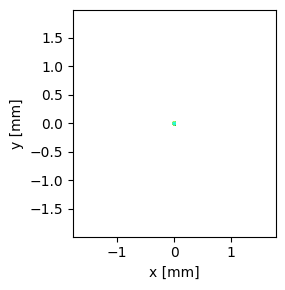

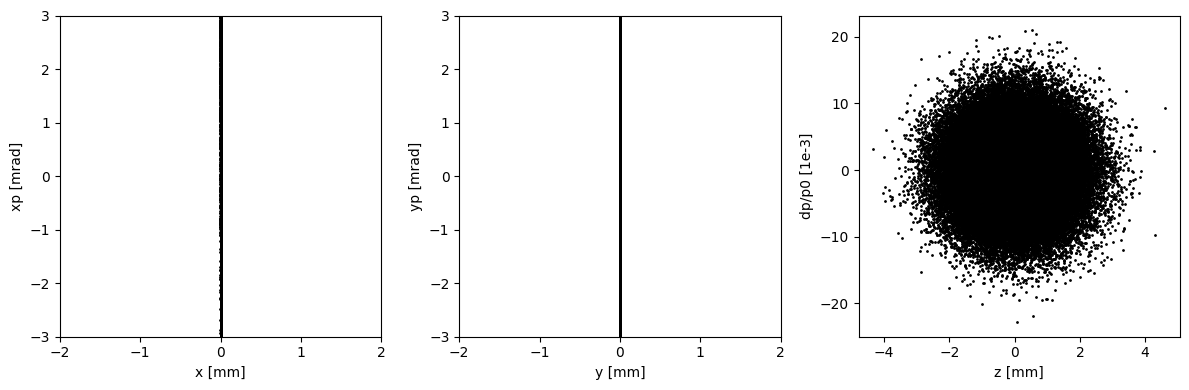

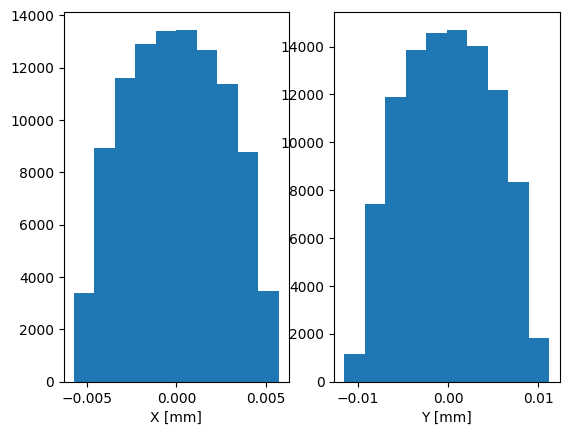

np.float64(0.005603830678934467)

In [ ]:
from bayes_opt import BayesianOptimization



def fn0(theta=30.0,f1=10.0, f2=10.0, plot = False):   # Defino a linha de transporte antes do dipolo, para que sejam encontrados valores precisos de f1 e f2 que minimizam o raio do feixe
                                                      # antes do dipolo. Esta função retorna o valor do raio do feixe antes do dipolo
    TL = pyaccel.InitilazeTransportLine( sx = 2.0, sxp = 0.01, sy = 2.0, syp = 0.01, sz = 1.0, sdppp0 = 5e-3 ,
                                    m0 = pyaccel.Proton_mass_kg, e0 = pyaccel.Electron_charge, E0 = 2.0, num = 100000,
                                    XYdistribution='uniform')
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=f1, setXdivergence=True, setYdivergence=False)
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=f2, setXdivergence=False, setYdivergence=True)
    TL.AddDriftSpace (L=0.20)
    TL.AddBendingMagnetX(BendingRadius = 0.5, BendingAngle = np.radians(30))
    TL.AddDriftSpace (L=0.10)
    TL.Propagate(N=7)


    if plot == True:
        TL.PlotBeamSpot(Rscale=2.0,MomentumColorScale=True)
        TL.PlotPhaseSpace(xlim=2.0,xplim=3.0,ylim=2.0,yplim=3.0)
        plt.figure()
        plt.subplot(121)
        plt.hist(TL.V[0,:])
        plt.xlabel('X [mm]')
        plt.subplot(122)
        plt.hist(TL.V[2,:])
        plt.xlabel('Y [mm]')
        plt.show()

    r0 = np.sqrt( TL.V[0,:].std()**2 + TL.V[2,:].std()**2 )      # Definição de r0 que deve ser minimizada

    del TL
    return r0


def fn1(f1=0.27, f2=0.23, fA = 0.1, fB = 0.1, fC = 0.1, plot = False): # Defino a linha de transporte completa. Os valores otimizados de f1 e f2 são introduzidos e então busca-se
                                                                       # valores de fA, fB e fC que minimizam a função. Esta função retorna o valor do raio do feixe ao final
                                                                       # da linha de transporte
    TL = pyaccel.InitilazeTransportLine( sx = 2.0, sxp = 0.01, sy = 2.0, syp = 0.01, sz = 1.0, sdppp0 = 5e-3 ,
                                    m0 = pyaccel.Proton_mass_kg, e0 = pyaccel.Electron_charge, E0 = 2.0, num = 100000,
                                    XYdistribution='uniform')

    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=f1, setXdivergence=True, setYdivergence=False)
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=f2, setXdivergence=False, setYdivergence=True)
    TL.AddDriftSpace (L=0.20)
    TL.AddBendingMagnetX(BendingRadius = 0.5, BendingAngle = np.radians(30))
    TL.AddDriftSpace (L=0.10)


    TL.AddDriftSpace (L=2.25)
    TL.AddThinLens(f=fA, setXdivergence=False, setYdivergence=True)
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=fB, setXdivergence=True, setYdivergence=False)
    TL.AddDriftSpace (L=0.10)
    TL.AddThinLens(f=fC, setXdivergence=False, setYdivergence=True)
    TL.AddDriftSpace (L=0.05)

    TL.Propagate(N= 14)
    if plot == True:
        TL.PlotBeamSpot(Rscale=2.0,MomentumColorScale=True)
        TL.PlotPhaseSpace(xlim=2.0,xplim=3.0,ylim=2.0,yplim=3.0)
        plt.figure()
        plt.subplot(121)
        plt.hist(TL.V[0,:])
        plt.xlabel('X [mm]')
        plt.subplot(122)
        plt.hist(TL.V[2,:])
        plt.xlabel('Y [mm]')
        plt.show()
    r0 = np.sqrt( TL.V[0,:].std()**2 + TL.V[2,:].std()**2 )  # Novamente, retorno o valor que deverá ser minimizado
    del TL
    return r0



def objective_fn0(f1, f2):   # A função BayesianOptimization, que será utilizada para encontrar os valores mínimos de f1, f2, fA, fB e fC busca pelo valor máximo, portanto
                             # redefino fn0 como -fn0, de modo que o máximo dessa função será o mínimo desejado
    return -fn0(f1=f1, f2=f2)

def otimizar_f1_f2(bounds_f1_f2):
    optimizer = BayesianOptimization(
        f=objective_fn0,    # função cujos parâmetros serão otimizados
        pbounds=bounds_f1_f2, # Intervalo onde serão buscados os valores das distâncias focais. Aqui são utilizados os valores encontrados no primeiro e seguindo passo
        random_state=42   # seed
    )

    optimizer.maximize(init_points=30, n_iter=100)    # faz 30 avaliações iniciais aleatórias e 100 iterações de otimização baseadas no modelo bayesiano

    resultado = optimizer.max  # armazena o valor máximo encontrado da função
    print("\nMelhores valores encontrados para f1 e f2:")
    print(f"f1 = {resultado['params']['f1']:.5f}")
    print(f"f2 = {resultado['params']['f2']:.5f}")
    print(f"r0 mínimo = {-resultado['target']:.5f}")
    return resultado['params']['f1'], resultado['params']['f2']  #Retorna os melhores valores de f1 e f2 para serem usados na próxima etapa.


# Etapa 2: otimizar fA, fB, fC com f1 e f2 fixos
def objective_fn1(fA, fB, fC):
    return -fn1(f1=best_f1, f2=best_f2, fA=fA, fB=fB, fC=fC)  # Novamente, redefino a função fn1 para que seu mínimo seja encontrado através do máximo de -fn1

def otimizar_fABC(bounds_fABC, f1_fixed, f2_fixed):  # Função que otimizará os parâmetros, levando como  input os valores calculados de f1 e f2 que minimizam fn0, ou seja,
                                                       # os valores que minimizam o raio do feixe antes do dipolo
    global best_f1, best_f2
    best_f1 = f1_fixed
    best_f2 = f2_fixed

    optimizer = BayesianOptimization(
        f=objective_fn1,
        pbounds=bounds_fABC,
        random_state=42
    )

    optimizer.maximize(init_points=30, n_iter=100) # Mesma lógica: 30 pontos aleatórios + 100 iterações otimizadas.

    resultado = optimizer.max
    print("\nMelhores valores encontrados para fA, fB e fC:")
    print(f"fA = {resultado['params']['fA']:.5f}")
    print(f"fB = {resultado['params']['fB']:.5f}")
    print(f"fC = {resultado['params']['fC']:.5f}")
    print(f"r0 mínimo = {-resultado['target']:.5f}")
    return resultado['params']        # Exibindo e armazenando os resultados otimizados


# Intervalos onde serão procurados os parâmetros
bounds_f1_f2 = {
    'f1': (0.26, 0.28),  # Sabemos pela primeira etapa que f1 ~ 0.27 e f2 ~ 0.23, portanto os intervalos são definidos de forma a abraanger estes valores
    'f2': (0.22, 0.24)
}

bounds_fABC = {
    'fA': (0.18, 0.19),   # Na segunda etapa, após printar os valores que geram o menor feixe, obtemos fA ~ 0.1846, fB ~ 0.0851 e fC ~ 0.046
    'fB': (0.08, 0.09),
    'fC': (0.03, 0.05)
}

# Rodando otimizações
best_f1, best_f2 = otimizar_f1_f2(bounds_f1_f2)
params_fABC = otimizar_fABC(bounds_fABC, best_f1, best_f2)

# Plotando resultado final com todos os parâmetros otimizados
fn1(
    f1=best_f1,
    f2=best_f2,
    fA=params_fABC['fA'],
    fB=params_fABC['fB'],
    fC=params_fABC['fC'],
    plot=True
)